In [1]:
# Import Dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import the California Population file and make it into a dataframe
cali_pop = pd.read_csv("../Resources/California_Population_Data.csv")

cali_pop.head()

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


In [3]:
# Delete the fips and county columns
population = cali_pop[["year", "age", "pop_total"]]

# Rename the population columns
population_df = population.rename(columns={"year":"Year", "age":"Age", "pop_total":"Total Pop"})
population_df.head()

,Year,Age,Total Pop
0,1970,0,17204
1,1970,1,16403
2,1970,2,15768
3,1970,3,16430
4,1970,4,17199


In [4]:
# Check the data for inconsistancies
population_df.count()

Year         474498
Age          474498
Total Pop    474498
dtype: int64

In [5]:
# Delete rows so we have ages of drivers between 16 to 80
population_df=population_df[population_df.Age > 15]
# population_df=population_df[population_df.Age < 81]

In [6]:
# Check to see what the age range is
population_df.Age.unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100], dtype=int64)

<IPython.core.display.Javascript object>


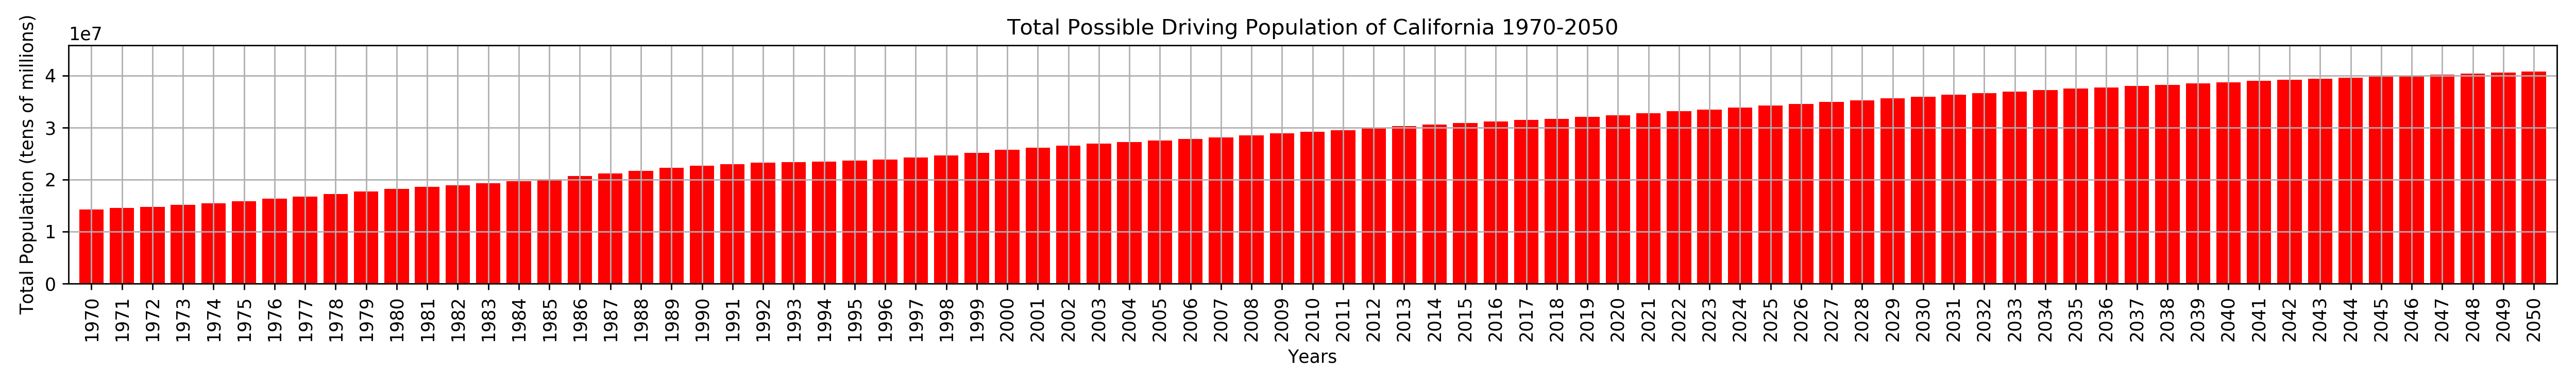

In [7]:
# Create a bar graph to show the total population of each year
# First make a grouped dataframe that is grouped by year
grouped_pop = population_df.groupby(['Year'])

grouped_total_pop = grouped_pop['Total Pop'].sum()

# Reset the index
population_pd = grouped_total_pop.reset_index()

# Make a bar graph
x_axis = np.arange(len(population_pd))

plt.figure(figsize=(20,3))
plt.bar(x_axis, population_pd['Total Pop'], color='r')

# Create labels, ticks, and limits for the graph
# Create the ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, population_pd['Year'], rotation="vertical")

# Set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(population_pd['Total Pop'])+5000000)

# Label the graph
plt.title("Total Possible Driving Population of California 1970-2050")
plt.xlabel("Years")
plt.ylabel("Total Population (tens of millions)")

plt.grid(True)

plt.tight_layout()

# Save the figure
plt.savefig("../Images/Total_Possible_Driving_Population_of_California.png")

<IPython.core.display.Javascript object>


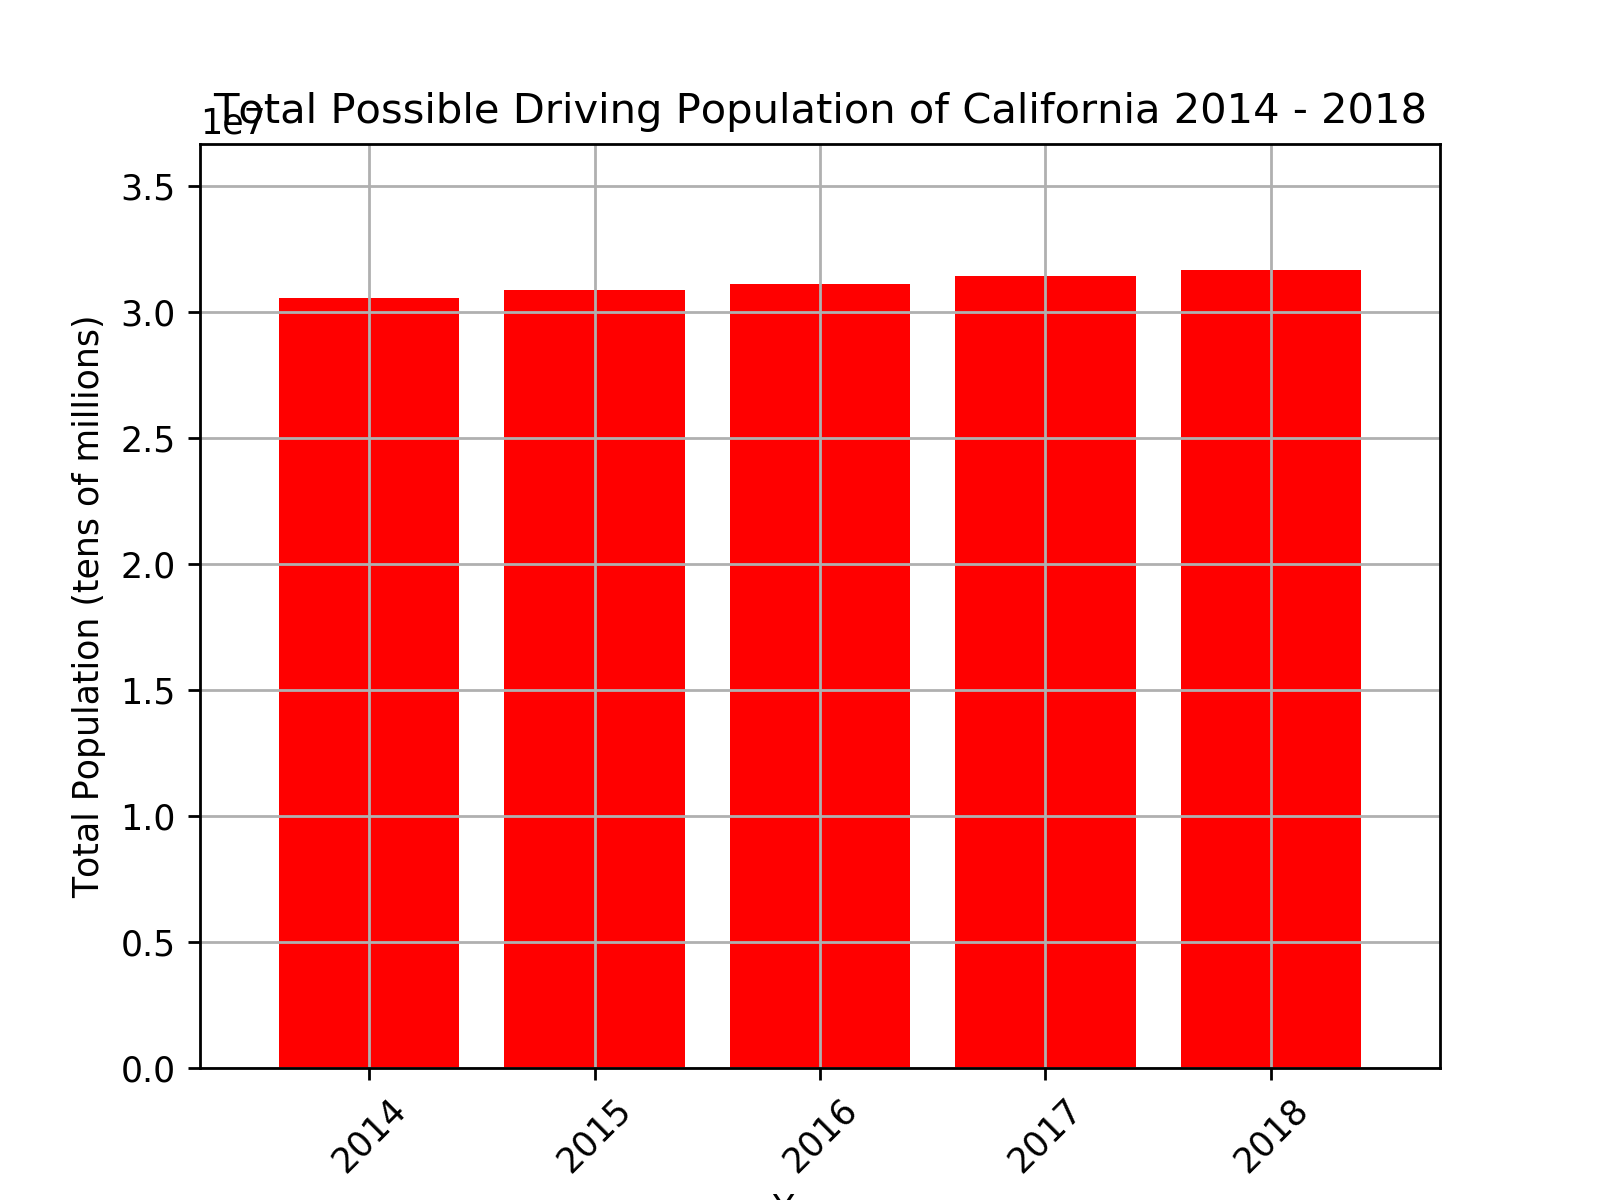

In [8]:
# Make a bar graph
# Note: indicies for the years 2014-2018 are 40-49
plt.figure()
decade_pop = [population_pd['Total Pop'][i] for i in range(44, 49)]

x_axis = np.arange(len(decade_pop))

plt.bar(x_axis, decade_pop, color='r')

# Create labels, ticks, and limits for the graph
# Create the ticks
labels = [population_pd['Year'][i] for i in range(44, 49)]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=45)

# Set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(decade_pop)+5000000)

# Label the graph
plt.title("Total Possible Driving Population of California 2014 - 2018")
plt.xlabel("Years")
plt.ylabel("Total Population (tens of millions)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/Total_Possible_Driving_Population_2014_to_2018.png")

# Now Use Data from online PDF for licensed Drivers in California from 2014 to 2018

In [9]:
# Link to where I got the data for licensed drivers in California between 2014-2018
# https://www.dmv.ca.gov/portal/wcm/connect/90a04dc3-ac0d-4528-a6a3-4797d0842689/dl_outs_by_county.pdf?MOD=AJPERES&CVID=
# Create a list for the total # of California drivers and the years
drivers = [25014468, 25914851, 26484646, 26957875, 27136792]
year = [2014, 2015, 2016, 2017, 2018]

# Create a dataframe to put the two lists together
cali_drivers = pd.DataFrame({"Year": year,
                            "Population of Drivers": drivers})

In [10]:
# Grab the driving population for a linear regression
dp_year = cali_drivers['Year']
cali_drivers_data = cali_drivers['Population of Drivers']
dp_slope, dp_int, dp_r, dp_p, dp_std_err = stats.linregress(dp_year, cali_drivers_data)
dp_fit = dp_slope * dp_year + dp_int

<IPython.core.display.Javascript object>


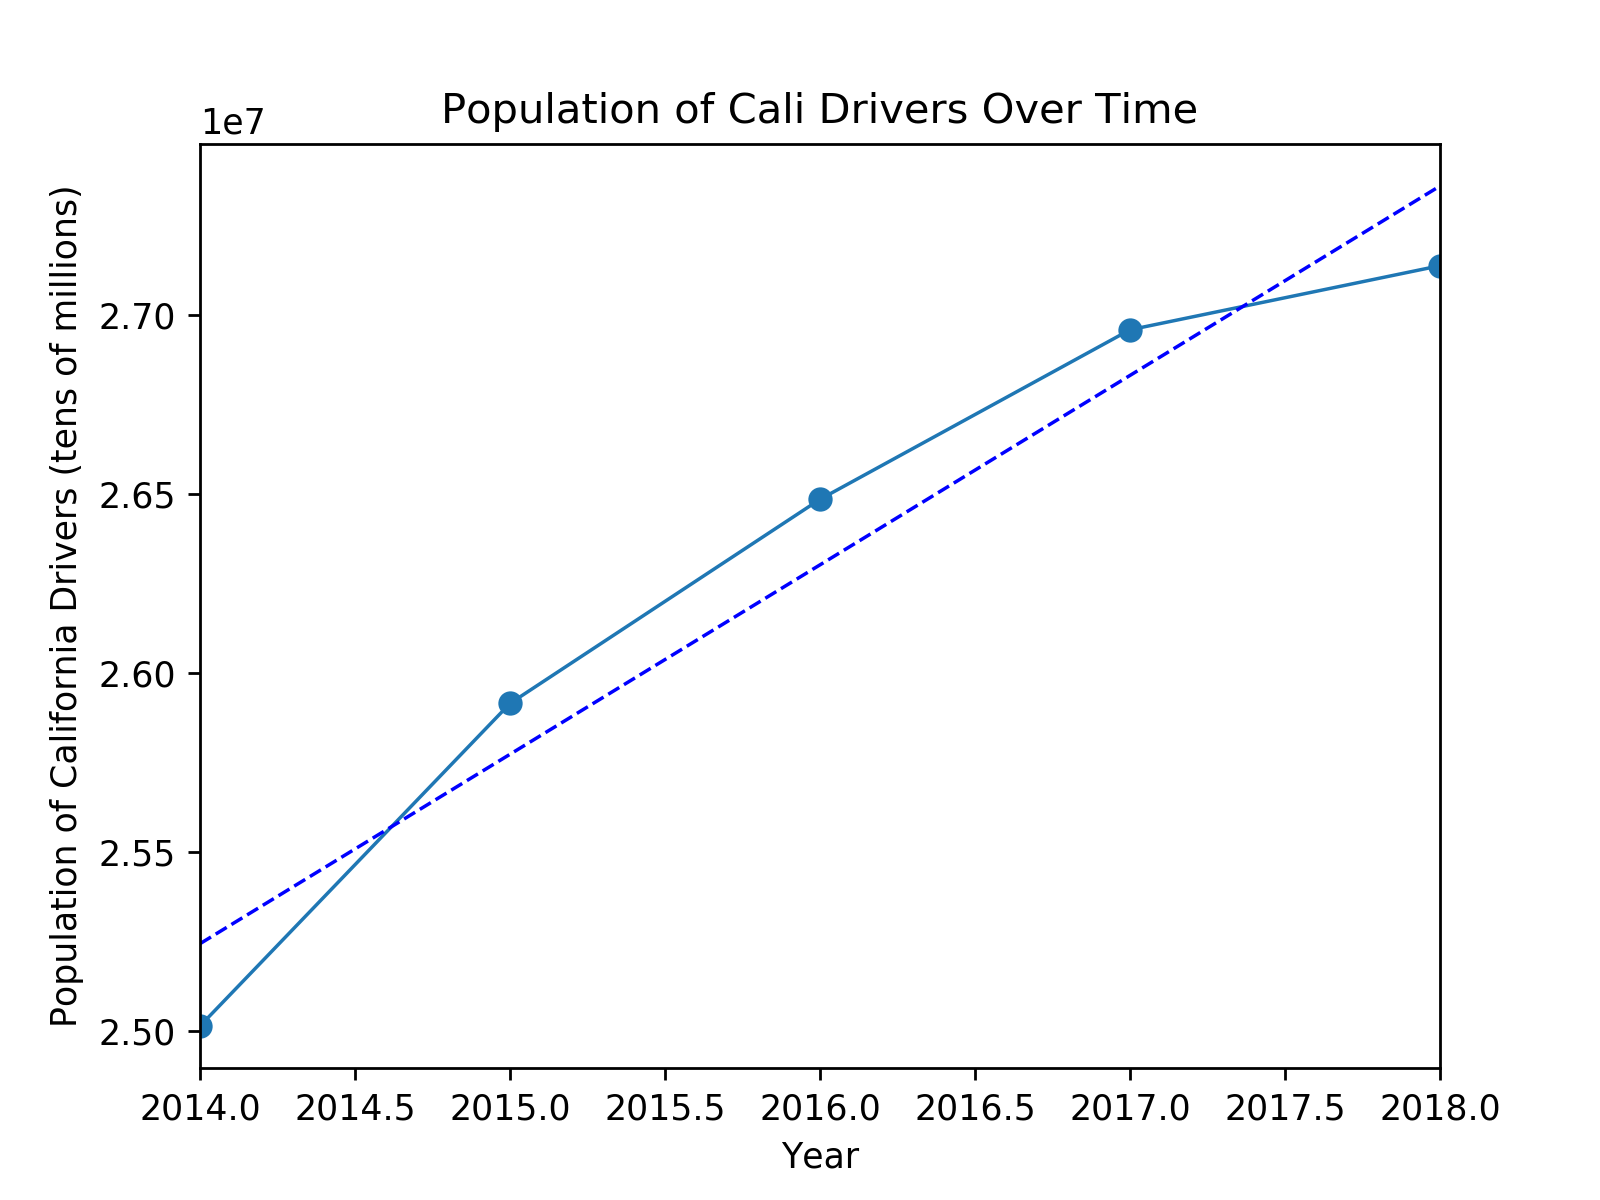

Text(0.5, 1.0, 'Population of Cali Drivers Over Time')

In [11]:
# Plot the data
fig, ax = plt.subplots()
ax.set_xlim(min(dp_year), max(dp_year))
ax.plot(dp_year, cali_drivers_data, linewidth=1, marker="o")
ax.plot(dp_year, dp_fit, "b--", linewidth=1)
ax.set_ylabel("Population of California Drivers (tens of millions)")
ax.set_xlabel("Year")
plt.title("Population of Cali Drivers Over Time")

In [12]:
# Do a linear regression to find the next 5 years of driving population
year = [2019, 2020, 2021, 2022, 2023, 2024]
print(f"The number of California drivers in the year {year[0]} will be {dp_slope * year[0] + dp_int}.")
print(f"The number of California drivers in the year {year[1]} will be {dp_slope * year[1] + dp_int}.")
print(f"The number of California drivers in the year {year[2]} will be {dp_slope * year[2] + dp_int}.")
print(f"The number of California drivers in the year {year[3]} will be {dp_slope * year[3] + dp_int}.")
print(f"The number of California drivers in the year {year[4]} will be {dp_slope * year[4] + dp_int}.")
print(f"The number of California drivers in the year {year[5]} will be {dp_slope * year[5] + dp_int}.")
plt.savefig("../Images/Linear_Regression_of_Cali_Drivers.png")

The number of California drivers in the year 2019 will be 27888028.0.
The number of California drivers in the year 2020 will be 28416795.19999993.
The number of California drivers in the year 2021 will be 28945562.399999976.
The number of California drivers in the year 2022 will be 29474329.599999905.
The number of California drivers in the year 2023 will be 30003096.799999952.
The number of California drivers in the year 2024 will be 30531864.0.


# Now lets look at the data for car mpg

In [13]:
# Import MPG Data
mpg_df = pd.read_csv("../Resources/Project_1_MPG_Data.csv")
mpg_df.head()

,Manufacturer,Car or Truck,Vehicle Type,Model Year,Fuel Economy (MPG) 2-Cycle 55/45*,Fuel Economy (MPG) Real-World City,Fuel Economy (MPG) Real-World Hwy,Fuel Economy (MPG) Real-World Comb,CO2 Emissions (g/mi) Real-World City,CO2 Emissions (g/mi) Real-World Hwy,...,Fuel Metering GDI,Port,TBI,Diesel,Multi- Valve,VVT,Hybrid,Vehicle Size: Small,Vehicle Size: Mid,Vehicle Size: Large
0,GM,Car,Sedan/Wagon,1975,15.1,11.8,14.4,12.8,751.0,619.0,...,NaN,2.2%,NaN,NaN,NaN,NaN,NaN,41.6%,26.0%,32.3%
1,GM,Car,Sedan/Wagon,1976,16.6,13.0,15.7,14.1,682.0,566.0,...,NaN,1.7%,NaN,NaN,NaN,NaN,NaN,44.2%,27.5%,28.3%
2,GM,Car,Sedan/Wagon,1977,17.7,14.0,16.6,15.1,634.0,534.0,...,NaN,1.2%,NaN,NaN,NaN,NaN,NaN,39.0%,26.5%,34.5%
3,GM,Car,Sedan/Wagon,1978,19.0,14.9,18.1,16.2,597.0,490.0,...,NaN,1.8%,NaN,0.7%,NaN,NaN,NaN,29.5%,36.7%,33.8%
4,GM,Car,Sedan/Wagon,1979,19.1,15.2,17.9,16.3,587.0,499.0,...,NaN,2.0%,NaN,2.7%,NaN,NaN,NaN,25.9%,40.5%,33.6%


In [14]:
# Check the data for any inconsistancies
mpg_df.count()

Manufacturer                              4576
Car or Truck                              4576
Vehicle\nType                             4576
Model Year                                4576
Fuel Economy (MPG) 2-Cycle 55/45*         3648
Fuel Economy (MPG) Real-World City        3648
Fuel Economy (MPG) Real-World Hwy         3648
Fuel Economy (MPG) Real-World Comb        3648
CO2 Emissions (g/mi) Real-World \nCity    3648
CO2 Emissions (g/mi) Real-World \nHwy     3648
CO2 Emissions (g/mi) Real-World\nComb     3648
Weight\n(lbs)                             3648
Foot\nprint (ft2)                         1070
Volume (Cu-Ft)                             563
Engine CID                                3648
Engine HP                                 3648
0-60 Time                                 3453
HP/\nCID                                  3648
HP/\nWT                                   3648
Ton-MPG                                   3648
Cu Ft-\nMPG                                563
Cu Ft-Ton-MPG

In [15]:
# Delete unnecessary columns
mpg_df.drop(mpg_df.columns[[4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 
                            25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]], axis = 1, inplace = True)
mpg_df.tail()

,Manufacturer,Car or Truck,Vehicle Type,Model Year,Fuel Economy (MPG) Real-World Comb,CO2 Emissions (g/mi) Real-World Comb
4571,All,All,All,2014,24.1,369.0
4572,All,All,All,2015,24.6,361.0
4573,All,All,All,2016,24.7,359.0
4574,All,All,All,2017,24.9,357.0
4575,All,All,All,2018,25.4,348.0


In [17]:
mpg_df.head()

,Manufacturer,Car or Truck,Vehicle Type,Model Year,Fuel Economy (MPG) Real-World Comb,CO2 Emissions (g/mi) Real-World Comb
0,GM,Car,Sedan/Wagon,1975,12.8,692.0
1,GM,Car,Sedan/Wagon,1976,14.1,630.0
2,GM,Car,Sedan/Wagon,1977,15.1,589.0
3,GM,Car,Sedan/Wagon,1978,16.2,549.0
4,GM,Car,Sedan/Wagon,1979,16.3,547.0


In [16]:
# Drop all rows with missing values
mpg_df = mpg_df.dropna(how='any')
mpg_df.count()

Manufacturer                             3648
Car or Truck                             3648
Vehicle\nType                            3648
Model Year                               3648
Fuel Economy (MPG) Real-World Comb       3648
CO2 Emissions (g/mi) Real-World\nComb    3648
dtype: int64